In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('titanic')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.shape

(891, 15)

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64

In [7]:
df['age'].replace(np.nan,24,inplace=True)

In [8]:
del df['deck']

In [9]:
df.dropna(subset=['embarked'],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [10]:
df.dropna(subset=['embark_town'],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [11]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

C:\Users\accounts\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

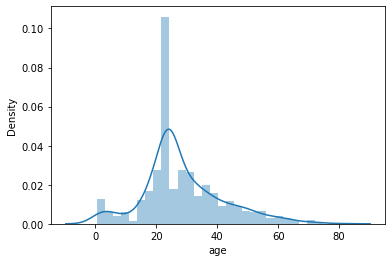

In [12]:
#Distplot
sns.distplot(df['age'])

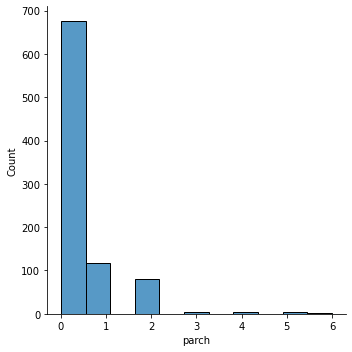

In [13]:
sns.displot(df['parch'])

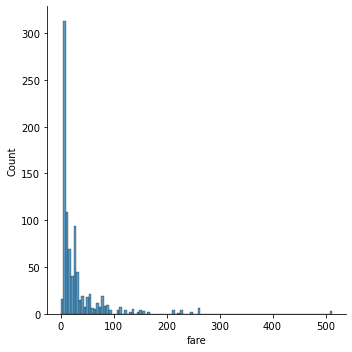

In [14]:
sns.displot(df['fare'])

<AxesSubplot:xlabel='fare', ylabel='Count'>

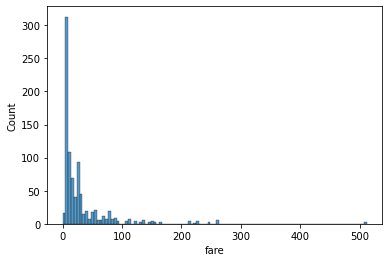

In [15]:
#Histogram
sns.histplot(x='fare',data=df)

<AxesSubplot:xlabel='age', ylabel='fare'>

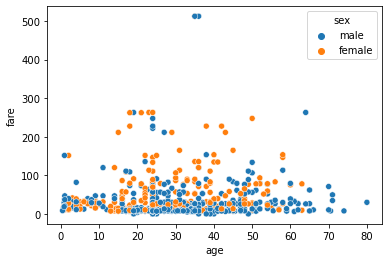

In [16]:
#ScatterPlot
sns.scatterplot(x='age',y='fare',hue='sex',data=df)

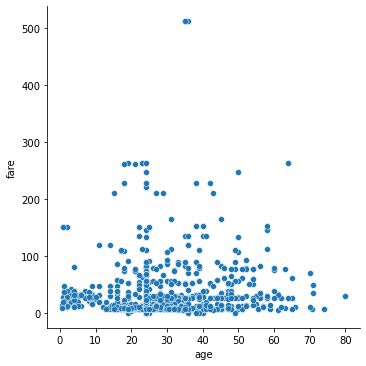

In [17]:
#Relational Plot
sns.relplot(data=df, x="age", y="fare")

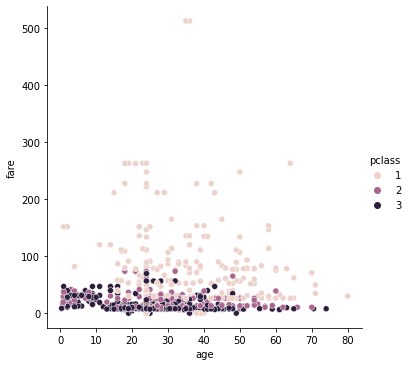

In [18]:
sns.relplot(data=df,x='age',y='fare',hue='pclass')

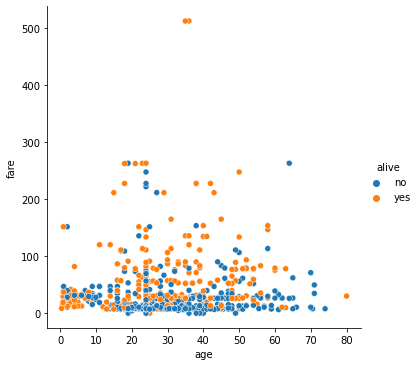

In [19]:
sns.relplot(data=df,x='age',y='fare',hue='alive')

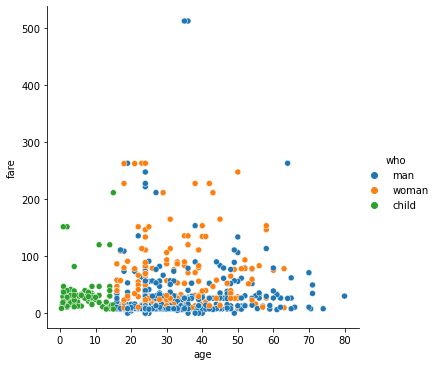

In [20]:
sns.relplot(data=df,x='age',y='fare',hue='who')

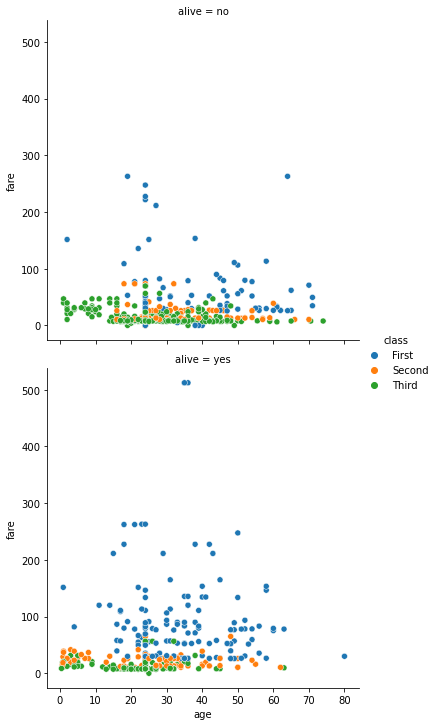

In [21]:
sns.relplot(data=df,x='age',y='fare',hue='class',row='alive')

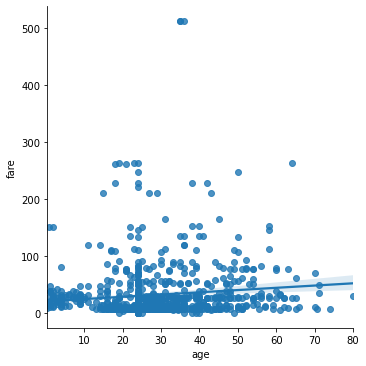

In [22]:
#LinearPlot
sns.lmplot(data=df,x='age',y='fare')

<AxesSubplot:xlabel='age', ylabel='fare'>

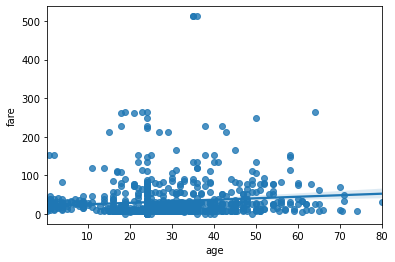

In [23]:
#RegPLot
sns.regplot(x='age',y='fare',data=df)

<AxesSubplot:xlabel='alive', ylabel='age'>

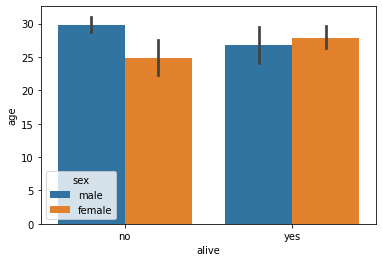

In [24]:
#Categorical Plot
sns.barplot(x='alive',y='age',hue='sex',data=df)

<AxesSubplot:xlabel='alive', ylabel='age'>

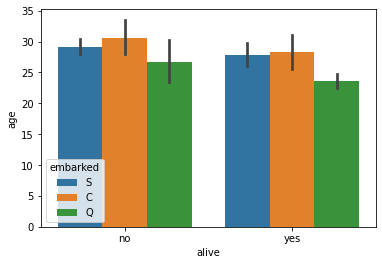

In [25]:
sns.barplot(x="alive", y="age", hue="embarked", data=df)   # Southampton, Cherbourg, and Queenstown

<AxesSubplot:xlabel='sex', ylabel='age'>

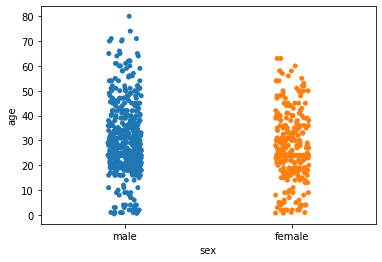

In [26]:
#StripPlot
sns.stripplot(x="sex", y="age", data=df)

<AxesSubplot:xlabel='age', ylabel='class'>

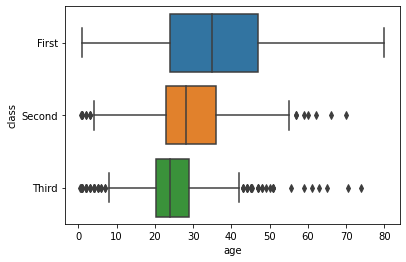

In [27]:
#BoxPlot
sns.boxplot(data=df,x='age',y='class')

<AxesSubplot:xlabel='age', ylabel='class'>

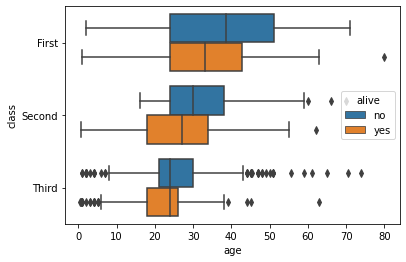

In [28]:
sns.boxplot(data=df,x='age',y='class',hue='alive')

<AxesSubplot:xlabel='survived', ylabel='age'>

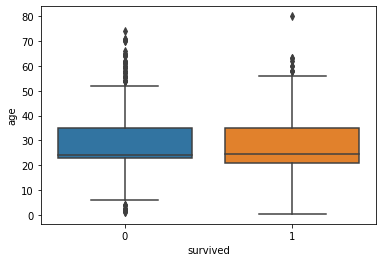

In [29]:
sns.boxplot(x="survived", y="age", data=df)

<AxesSubplot:xlabel='survived', ylabel='age'>

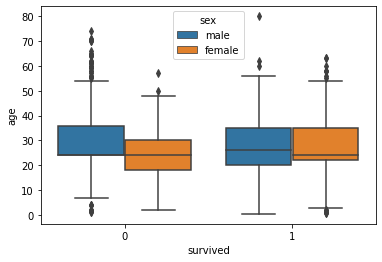

In [30]:
sns.boxplot(x="survived", y="age",hue='sex', data=df)

<AxesSubplot:xlabel='alive', ylabel='age'>

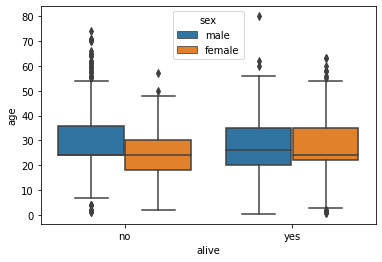

In [31]:
sns.boxplot(x="alive", y="age",hue='sex', data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

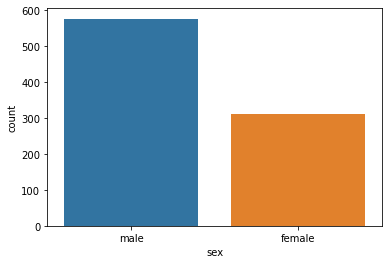

In [32]:
#CountPlot
sns.countplot(x='sex',data=df)

<AxesSubplot:xlabel='alive', ylabel='count'>

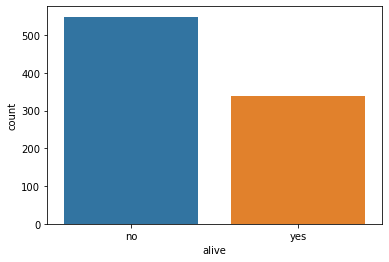

In [33]:
sns.countplot(x='alive',data=df)

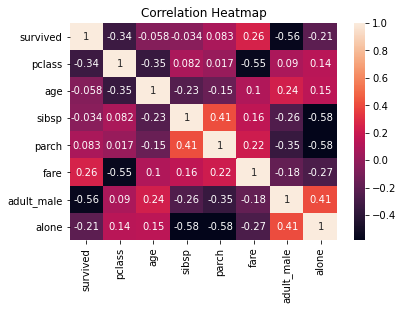

In [34]:
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
df['Agegroup']=0
age_groups=['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
df['Agegroup']=pd.cut(df['age'],range(0,90,10),labels=age_groups)

def age_group_summary(df,age_groups):
    age_survival=df[['Agegroup','survived']].groupby('Agegroup').agg(['mean','count','sum'])
    age_survival=age_survival.reindex(age_groups)
    age_survival.columns=age_survival.columns.droplevel()
    age_survival.columns=['Survival rate','Total','survived']
    age_survival['Died']=age_survival['Total']-age_survival['survived']
    return age_survival


In [38]:
age_survival=age_group_summary(df,age_groups)
age_survival

,Survival rate,Total,survived,Died
Agegroup,,,,
1-10,0.593750,64,38,26
11-20,0.382609,115,44,71
21-30,0.334152,407,136,271
31-40,0.441558,154,68,86
41-50,0.383721,86,33,53
51-60,0.404762,42,17,25
61-70,0.187500,16,3,13
71-80,0.200000,5,1,4


<AxesSubplot:xlabel='Agegroup', ylabel='survived'>

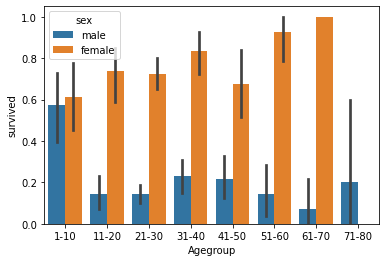

In [39]:
sns.barplot(x="Agegroup", y="survived", hue="sex", data=df)

<AxesSubplot:xlabel='Agegroup', ylabel='count'>

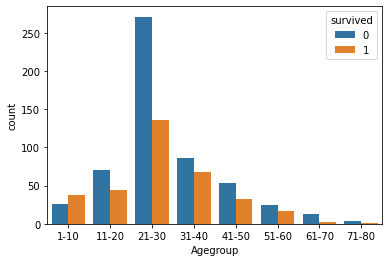

In [40]:
sns.countplot(x='Agegroup',data=df,hue='survived')